<a href="https://colab.research.google.com/github/yustinaivanova/netology_statistics/blob/master/dz_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашнее задание по статистическому анализу на python

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline
import statistics

Загрузить датасет по url:


In [2]:
url="http://yustiks.ru/dataset/world-happiness-report-2019.csv"
df=pd.read_csv(url)

Более подробно о датасете можно прочитать по [данной ссылке](https://data.world/promptcloud/world-happiness-report-2019) или по [ссылке в kaggle](https://www.kaggle.com/PromptCloudHQ/world-happiness-report-2019)

Context

The World Happiness Report is a landmark survey of the state of global happiness that ranks 156 countries by how happy their citizens perceive themselves to be. This year’s World Happiness Report focuses on happiness and the community: how happiness has evolved over the past dozen years, with a focus on the technologies, social norms, conflicts and government policies that have driven those changes.



*  **Country (region)** Name of the country.
*  **Ladder** Cantril Ladder is a measure of life satisfaction.
*  **SD of Ladder** Standard deviation of the ladder.
*  **Positive affect** Measure of positive emotion.
*  **Negative affect** Measure of negative emotion.
*  **Social support** The extent to which Social support contributed to the calculation of the Happiness Score.
*  **Freedom** The extent to which Freedom contributed to the calculation of the Happiness Score.
*  **Corruption** The extent to which Perception of Corruption contributes to Happiness Score.
*  **Generosity** The extent to which Generosity contributed to the calculation of the Happiness Score.
*  **Log of GDP per capita** The extent to which GDP contributes to the calculation of the Happiness Score.
*  **Healthy life expectancy** The extent to which Life expectancy contributed to the calculation of the Happiness Score.

Посмотреть первые несколько рядов таблицы

In [3]:
df.head()

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP per capita,Healthy life expectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0


In [4]:
freedom = df['Freedom'].dropna()
freedom.head()

0     5.0
1     6.0
2     3.0
3     7.0
4    19.0
Name: Freedom, dtype: float64

Построить частотный график для двух параметров: Freedom и positive affect. Какое это распределение?

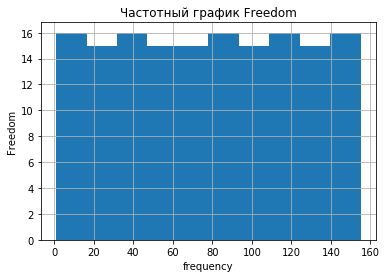

In [5]:
counts, bins = np.histogram(freedom)
plt.hist(bins[:-1], bins, weights=counts)
plt.xlabel('frequency')
plt.ylabel('Freedom')
plt.title('Частотный график Freedom')
plt.grid(True)
plt.show()

In [6]:
positive_effect = df['Positive affect'].dropna()
positive_effect.describe()

count    155.000000
mean      78.000000
std       44.888751
min        1.000000
25%       39.500000
50%       78.000000
75%      116.500000
max      155.000000
Name: Positive affect, dtype: float64

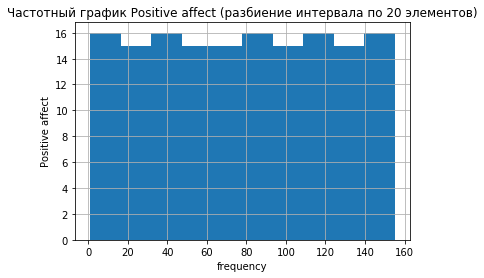

In [7]:
plt.hist(positive_effect)

plt.xlabel('frequency')
plt.ylabel('Positive affect')
plt.title('Частотный график Positive affect (разбиение интервала по 20 элементов)')
plt.grid(True)
plt.show()

Найти медиану, моду, математическое ожидание, стандартное отклонение,  дисперсию, минимум и максимум, найти выбросы (если есть), размах для колонки Freedom

In [8]:
import statistics
print('Медиана: ', statistics.median(df['Freedom']))
print('Математическое ожидание: ', statistics.mean(df['Freedom']))
print('Стандартное отклонение: ', statistics.pstdev(df['Freedom']))
print('Дисперсия: ', statistics.pvariance(df['Freedom']))
print('Минимум: ', df['Freedom'].min())
print('Максимум: ', df['Freedom'].max())
print('Размах: ', df['Freedom'].max() - df['Freedom'].min())

Медиана:  71.0
Математическое ожидание:  nan
Стандартное отклонение:  nan
Дисперсия:  nan
Минимум:  1.0
Максимум:  155.0
Размах:  154.0


Почему нельзя найти моду?

Посмотреть корреляцию между Freedom и positive affect (графически и математически). Графически - plt.scatter, математически - посчитать коэффициент Пирсона. О чем говорит знак коэффициента?

In [11]:
freedom = df['Freedom'].dropna()
positive_effect = df['Positive affect'].dropna()

Коэффициент корреляции Пирсона: 0.6817698430601656


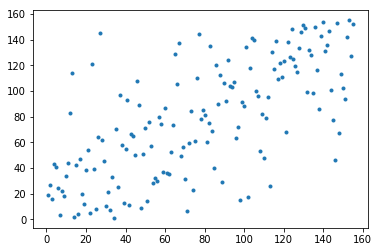

In [12]:
from scipy.stats import pearsonr
corr, p_value = pearsonr(freedom, positive_effect)
plt.scatter(freedom, positive_effect, marker='.')
print('Коэффициент корреляции Пирсона:', corr)

In [13]:
# Значительная положительная корреляция

Нормализовать данные колонки Freedom (централизация + масштабирование)

In [14]:
freedom_1 = freedom - statistics.mean(freedom)
print(statistics.mean(freedom_1))

0.0


In [15]:
min(freedom_1)

-77.0

In [16]:
max(freedom_1)

77.0

In [17]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))

freedom_2 = min_max_scaler.fit_transform(np.array(freedom_1).reshape(-1, 1))
print(min(freedom_2))
print(max(freedom_2))

[-1.]
[1.]


Построить матрицу корреляций для всех колонок таблицы

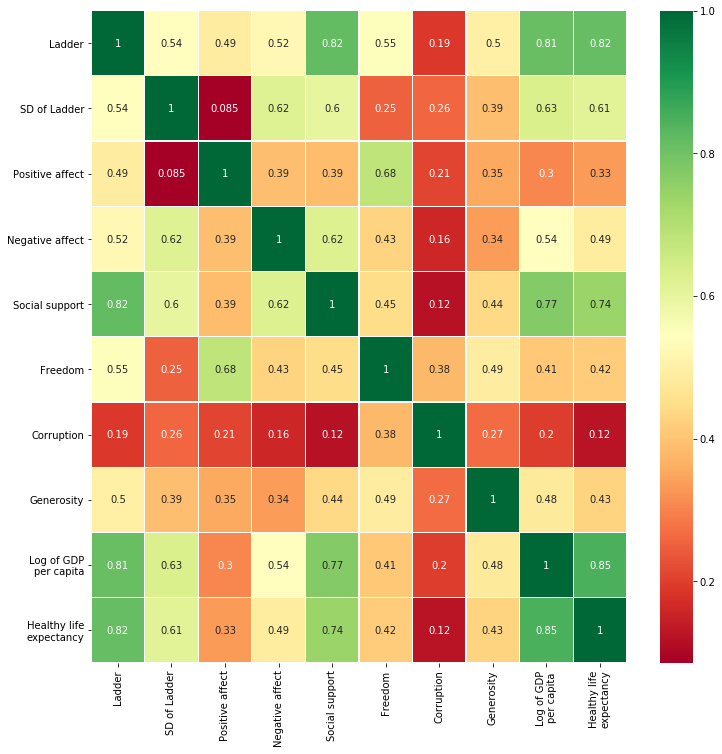

In [18]:
import seaborn as sns
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) 
fig=plt.gcf()
fig.set_size_inches(12,12)
plt.show()

В данном датасете некоторые атрибуты значительно коррелируют. Какие? Почему?

In [20]:
#Social support / ladder
#Social support / GDP per capita
#Social support / healthry life expectancy
#Ladder / GDP per capita
#Ladder / healthy life expectancy
# значительные коэффициенты корреляции

Загрузить таблицу цен на авокадо: 

In [21]:
import io
import requests
url="http://yustiks.ru/avocado.csv"
df=pd.read_csv(url)
df[:3]

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany


Сделать частотный график колонки AveragePrice. Какое это распределение?

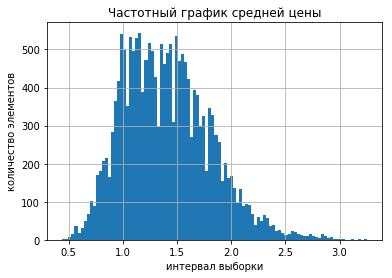

In [23]:
average_price = df['AveragePrice']
plt.hist(average_price,100)
plt.xlabel('интервал выборки')
plt.ylabel('количество элементов')
plt.title('Частотный график средней цены')
plt.grid(True)
plt.show()
# распределение близко к нормальному

Найти корреляцию в следующих колонках:

колонкой 4046, 4225, 4770 и Average Price. Если корелляция есть (обратная или прямая), то какие выводы можно сделать?

In [24]:
df_1 = df['4046']
df_2 = df['4225']
df_3 = df['4770']
price = df['AveragePrice']
corr_1, p_value = pearsonr(df_1, price)
corr_2, p_value = pearsonr(df_2, price)
corr_3, p_value = pearsonr(df_3, price)
print(corr_1)
print(corr_2)
print(corr_3)

-0.20831704848788477
-0.17292777250933536
-0.1794459839797562


In [26]:
# Слабая отрицательная корреляция

Написать временные предсказания цен на авокадо типа organic для выбранного региона: LasVegas, начиная с августа 2017 года до конца марта 2018. В качестве тренировочных данных использовать данные до июля 2017 года включительно.
В качестве примера использовать лекционный материал в lecture_1.ipynb

In [0]:
# к сожалению, prophet не устанавливается, но код должен быть примерно таким:

import io
import requests
url="http://yustiks.ru/avocado.csv"
df=pd.read_csv(url)
df['Date'] = pd.to_datetime(df['Date'])
PREDICTION_TYPE = 'organic'
df_org = df[df.type == PREDICTION_TYPE]
regions = df_org.groupby(df_org.region)
PREDICTING_FOR = "LasVegas"
date_price = regions.get_group(PREDICTING_FOR)[['Date', 'AveragePrice']].reset_index(drop=True)
date_price = date_price.rename(columns={'Date':'ds', 'AveragePrice':'y'})
date_price = date_price.sort_values(by='ds')
amount_80 = int(len(date_price)*0.8)
train_price = date_price[:amount_80]
test_price = date_price[amount_80:]
from fbprophet import Prophet
m = Prophet()
m.fit(train_price)
future = m.make_future_dataframe(periods=240)
forecast = m.predict(future)